# COM3110: Text Processing (2023/2024)

## Assignment: Sentiment Analysis of Movie Reviews



# 1. Project Description
The aim of this project is to implement a multinomial Naive Bayes model for a sentiment analysis task using the Rotten Tomatoes movie review dataset. This dataset is derived from the
"Sentiment Analysis on Movie Reviews" Kaggle competition, that uses data from the works of Pang and Lee [1] and Socher at al. [2]. Obstacles like sentence negation, sarcasm, terseness,
language ambiguity, and many others make this task very challenging

# 2. Submission
Submit your assignment work electronically via Blackboard. Precise instructions for what files to
submit are given later in this document. Please check you have access to the relevant Blackboard
unit and contact the module lecturer if not.

SUBMISSION DEADLINE: 15:00, Friday week 12 (15th December, 2023)

Penalties: standard departmental penalties apply for late hand-in and use of unfair means.

Important: the use of any generative AI tools in the preparation of the solution to this work
(both code and report) is not permitted.

# 3. Materials Provided
Download the file COM3110_assignment2_files.zip from the Blackboard course. It unzips to
a folder that contains a number of code and data files, for use in the assignment.
NB_sentiment_analyser.py is the starter code for this project. It contains the standard
input and output requirements. You should use this file as you main method and should ensure
that any additional output (that you may have added to help debug your program) is removed
before submission (see more details below).

# 3.1 Dataset: Movie Reviews
The dataset in the moviereviews folder is a corpus of movie reviews originally collected by Pang and Lee [1]. This dataset contains tab-separated files with phrases from the Rotten Tomatoes
dataset. The data are split into train/dev/test sets and the sentences are shuffled from their original order.

• Each sentence has a SentenceId.

• Sentences have already been tokenized

https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/overview

The training, dev and test set contain respectively 6529, 1000 and 1000 sentences. The sentences
are labelled on a scale of five values:
0. negative
1. somewhat negative
2. neutral
3. somewhat positive
4. positive
In the following table you can find several sentences and their sentiment score. Please note
that the test set is "blind", i.e. you are not given the gold standard sentiment scores. You
will need to submit some files with the predicted labels for the test set and we will use these as
part of your assessment (see below).


| SentenceId | Sentence                                         | Sentiment |
|------------|--------------------------------------------------|-----------|
| 1292       | The Sweetest Thing leaves a bitter taste.         | 0         |
| 343        | It labours as storytelling.                       | 1         |
| 999        | There's plenty to enjoy – in no small part thanks to Lau. | 3         |
| 1227       | Compellingly watchable.                           |         4  |

In [1]:
import pandas as pd
sub_df=pd.read_csv("SampleSubmission_test_predictions_3classes_acpXXjd.tsv",sep='\t')

In [2]:
sub_df

,SentenceID,Sentiment
0,1742,0
1,972,2
2,2260,0
3,1631,0
4,898,2
...,...,...
995,5653,0
996,220,0
997,1118,0
998,2956,2


In [3]:
dev =pd.read_csv("dev.tsv",sep='\t')
test =pd.read_csv("test.tsv",sep='\t')
train =pd.read_csv("train.tsv",sep='\t')

In [4]:
dev

,SentenceId,Phrase,Sentiment
0,7971,It irritates and saddens me that Martin Lawren...,1
1,2912,It 's up to -LRB- Watts -RRB- to lend credibil...,3
2,1152,Would be an unendurable viewing experience for...,3
3,4551,There is a welcome lack of pretension about th...,4
4,5809,"The slapstick is labored , and the bigger setp...",0
...,...,...,...
995,3557,This thing is just garbage .,0
996,7704,Unfolds in a series of achronological vignette...,3
997,3524,"A thoroughly engaging , surprisingly touching ...",4
998,3070,This harrowing journey into combat hell vividl...,2


In [5]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SentenceId  1000 non-null   int64 
 1   Phrase      1000 non-null   object
 2   Sentiment   1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [6]:
test

,SentenceId,Phrase
0,1742,"As David Letterman and The Onion have proven ,..."
1,972,The creative animation work may not look as fu...
2,2260,Amazingly dopey .
3,1631,"It 's not the worst comedy of the year , but i..."
4,898,-LRB- Ramsay -RRB- visually transforms the dre...
...,...,...
995,5653,"A predictable , manipulative stinker ."
996,220,A film that plays things so nice 'n safe as to...
997,1118,"Anemic , pretentious ."
998,2956,Peter Jackson has done the nearly impossible .


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SentenceId  1000 non-null   int64 
 1   Phrase      1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
train

,SentenceId,Phrase,Sentiment
0,7068,"Overall , it 's a wacky and inspired little fi...",2
1,4991,A poignant comedy that offers food for thought .,4
2,7318,It 's a Frankenstein-monster of a film that do...,1
3,1927,The delicious trimmings ... arrive early and s...,4
4,8426,"It 's pretty linear and only makeup-deep , but...",3
...,...,...,...
6524,6308,... one of the more influential works of the `...,4
6525,6029,Excellent performances from Jacqueline Bisset ...,4
6526,1270,"Rock solid family fun out of the gates , extre...",3
6527,4580,A dopey movie clothed in excess layers of hipn...,2


In [9]:
train.Sentiment.value_counts()

Sentiment
3    1757
1    1687
2    1294
4     988
0     803
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

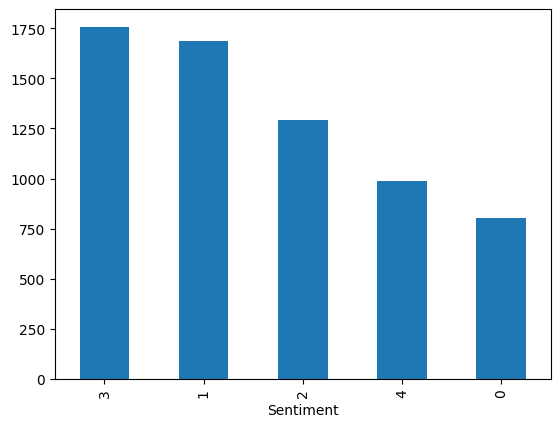

In [10]:
train['Sentiment'].value_counts().plot(kind='bar')


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6529 entries, 0 to 6528
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SentenceId  6529 non-null   int64 
 1   Phrase      6529 non-null   object
 2   Sentiment   6529 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 153.1+ KB


In [36]:
train.Phrase[0:5]

0    Overall , it 's a wacky and inspired little fi...
1     A poignant comedy that offers food for thought .
2    It 's a Frankenstein-monster of a film that do...
3    The delicious trimmings ... arrive early and s...
4    It 's pretty linear and only makeup-deep , but...
Name: Phrase, dtype: object

In [37]:
train['Phrase']

0       Overall , it 's a wacky and inspired little fi...
1        A poignant comedy that offers food for thought .
2       It 's a Frankenstein-monster of a film that do...
3       The delicious trimmings ... arrive early and s...
4       It 's pretty linear and only makeup-deep , but...
                              ...                        
6524    ... one of the more influential works of the `...
6525    Excellent performances from Jacqueline Bisset ...
6526    Rock solid family fun out of the gates , extre...
6527    A dopey movie clothed in excess layers of hipn...
6528    Highly irritating at first , Mr. Koury 's pass...
Name: Phrase, Length: 6529, dtype: object

In [38]:
def map_to_3_scale(sentiment):
    if sentiment in [0, 1]:
        return 0
    elif sentiment == 2:
        return 1  
    else:
        return 2 
train['Sentiment'] = train['Sentiment'].apply(map_to_3_scale)

In [51]:
dev['Sentiment'] = dev['Sentiment'].apply(map_to_3_scale)

In [52]:
train

,SentenceId,Phrase,Sentiment
0,7068,"Overall , it 's a wacky and inspired little fi...",1
1,4991,A poignant comedy that offers food for thought .,2
2,7318,It 's a Frankenstein-monster of a film that do...,0
3,1927,The delicious trimmings ... arrive early and s...,2
4,8426,"It 's pretty linear and only makeup-deep , but...",2
...,...,...,...
6524,6308,... one of the more influential works of the `...,2
6525,6029,Excellent performances from Jacqueline Bisset ...,2
6526,1270,"Rock solid family fun out of the gates , extre...",2
6527,4580,A dopey movie clothed in excess layers of hipn...,1


In [53]:
train.Phrase

0       Overall , it 's a wacky and inspired little fi...
1        A poignant comedy that offers food for thought .
2       It 's a Frankenstein-monster of a film that do...
3       The delicious trimmings ... arrive early and s...
4       It 's pretty linear and only makeup-deep , but...
                              ...                        
6524    ... one of the more influential works of the `...
6525    Excellent performances from Jacqueline Bisset ...
6526    Rock solid family fun out of the gates , extre...
6527    A dopey movie clothed in excess layers of hipn...
6528    Highly irritating at first , Mr. Koury 's pass...
Name: Phrase, Length: 6529, dtype: object

In [54]:
train.Sentiment.value_counts()

2    2745
0    2490
1    1294
Name: Sentiment, dtype: int64

In [55]:
import pandas as pd
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.class_count = defaultdict(int)
        self.word_count = defaultdict(lambda: defaultdict(int))
        self.vocab = set()
        self.alpha = 1 

    def fit(self, X, y):
        
        for i in range(len(X)):
            words = X.iloc[i].split()  
            label = y.iloc[i]

            self.class_count[label] += 1
            for word in words:
                self.word_count[label][word] += 1
                self.vocab.add(word)

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            words = X.iloc[i].split()  

            max_prob = float('-inf')
            argmax_label = None

            for label in self.class_count.keys():
                log_prob = 0.0
                class_word_count = sum(self.word_count[label].values())

                for word in words:
                    word_freq = self.word_count[label][word]
                    word_prob = (word_freq + self.alpha) / (class_word_count + self.alpha * len(self.vocab))
                    log_prob += word_prob

                log_prob += self.class_count[label] 
                if log_prob > max_prob:
                    max_prob = log_prob
                    argmax_label = label

            predictions.append(argmax_label)

        return predictions


In [44]:
X_train = train.Phrase
X_train

0       Overall , it 's a wacky and inspired little fi...
1        A poignant comedy that offers food for thought .
2       It 's a Frankenstein-monster of a film that do...
3       The delicious trimmings ... arrive early and s...
4       It 's pretty linear and only makeup-deep , but...
                              ...                        
6524    ... one of the more influential works of the `...
6525    Excellent performances from Jacqueline Bisset ...
6526    Rock solid family fun out of the gates , extre...
6527    A dopey movie clothed in excess layers of hipn...
6528    Highly irritating at first , Mr. Koury 's pass...
Name: Phrase, Length: 6529, dtype: object

In [45]:
y_train=train.Sentiment
y_train

0       1
1       2
2       0
3       2
4       2
       ..
6524    2
6525    2
6526    2
6527    1
6528    1
Name: Sentiment, Length: 6529, dtype: int64

In [46]:
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

In [47]:
X_train = train['Phrase']
y_train = train['Sentiment']

nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

In [63]:
y_train.tolist()

[1,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,


In [56]:
train_predictions = nb_classifier.predict(train['Phrase'])
print(train_predictions)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [48]:
predictions = nb_classifier.predict(test['Phrase'])
print(predictions)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [49]:
predictions_dev = nb_classifier.predict(dev['Phrase'])
print(predictions_dev)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [69]:
from collections import defaultdict

def calculate_macro_f1(y_true, y_pred, num_classes):
    precision = defaultdict(float)
    recall = defaultdict(float)
    f1 = defaultdict(float)

    for i in range(num_classes):
        true_positives = sum((y_true == i) & (y_pred == i))
        false_positives = sum((y_true != i) & (y_pred == i))
        false_negatives = sum((y_true == i) & (y_pred != i))

        precision[i] = true_positives / (true_positives + false_positives + 1e-10)
        recall[i] = true_positives / (true_positives + false_negatives + 1e-10)
        f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i] + 1e-10)

    macro_f1 = sum(f1.values()) / num_classes
    return macro_f1, precision, recall, f1


In [70]:
score = macro_f1_score(y_train.tolist(), train_predictions)
print("Macro F1 score:", score)


Macro F1 score: 0.0


In [76]:
import numpy as np

def confusion_matrix(y_true, y_pred, num_classes):
    # Initialize confusion matrix with zeros
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    # Populate confusion matrix
    for i in range(len(y_true)):
        matrix[y_true[i]][y_pred[i]] += 1

    return matrix


In [77]:
# Convert lists to NumPy arrays
y_train = np.array(y_train)
train_predictions = np.array(train_predictions)

# Determine the number of unique classes in your data
num_classes = len(np.unique(y_train))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, train_predictions, num_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[   0    0 2490]
 [   0    0 1294]
 [   0    0 2745]]
